In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from arch import arch_model
from matplotlib import pyplot as plt

%matplotlib inline

In [26]:
price_df = pd.read_csv('data/raw/Housing_SalePrice_US.csv')
price_df.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [27]:
# Datetime objects are easier to work with

print(price_df.info())

price_df['DATE'] = pd.to_datetime(price_df['DATE'], format='%Y-%m-%d')

# After
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    237 non-null    object 
 1   MSPUS   237 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    237 non-null    datetime64[ns]
 1   MSPUS   237 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


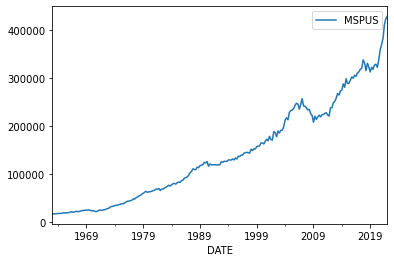

In [28]:
price_df.plot.line('DATE', 'MSPUS')
plt.show()

In [29]:
macro_df = pd.read_csv('data/raw/Macroecon_US.csv')

# Get the Date column in to a format strftime can handle
macro_df['Date'] = macro_df['Date'].astype('str') + '.01'  # Assume data is from the first of each month
macro_df['Date'] = macro_df['Date'].str.replace('.', '-')
print(macro_df.head())

# Convert to datetime object
macro_df['Date'] = pd.to_datetime(macro_df['Date'], format='%Y.%m')

macro_df.head()

         Date  S&P Comp.  Dividend  Earnings    Consumer Price Index CPI  \
0  1871-01-01       4.44      0.26       0.4                       12.46   
1  1871-02-01       4.50      0.26       0.4                       12.84   
2  1871-03-01       4.61      0.26       0.4                       13.03   
3  1871-04-01       4.74      0.26       0.4                       12.56   
4  1871-05-01       4.86      0.26       0.4                       12.27   

   Date Fraction    Long Interest Rate GS10  Real Price  Real Dividend  \
0          1871.04                     5.32      103.43           6.06   
1          1871.13                     5.32      101.72           5.88   
2          1871.21                     5.33      102.68           5.79   
3          1871.29                     5.33      109.58           6.01   
4          1871.38                     5.33      114.97           6.15   

   Real Total Return Price   ...  Excess CAPE Yield  \
0                   103.43   ...           

/tmp/ipykernel_32399/835139016.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  macro_df['Date'] = macro_df['Date'].str.replace('.', '-')


,Date,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,...,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1871-01-01,4.44,0.26,0.4,12.46,1871.04,5.32,103.43,6.06,103.43,...,NaN,1.0,1.00,13.06%,9.25%,3.81%,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,1871.13,5.32,101.72,5.88,102.21,...,NaN,1.0,0.97,13.09%,9.46%,3.62%,NaN,NaN,NaN,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,1871.21,5.33,102.68,5.79,103.66,...,NaN,1.0,0.96,13.10%,9.62%,3.48%,NaN,NaN,NaN,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,1871.29,5.33,109.58,6.01,111.13,...,NaN,1.0,1.00,12.21%,9.10%,3.11%,NaN,NaN,NaN,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,1871.38,5.33,114.97,6.15,117.11,...,NaN,1.0,1.03,12.26%,8.95%,3.31%,NaN,NaN,NaN,NaN


In [30]:
supply_df = pd.read_csv('data/raw/Monthly_Supply_New_Houses_US.csv')

supply_df['DATE'] = pd.to_datetime(supply_df['DATE'], format='%Y-%m-%d')

supply_df.head()

,DATE,MSACSR
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


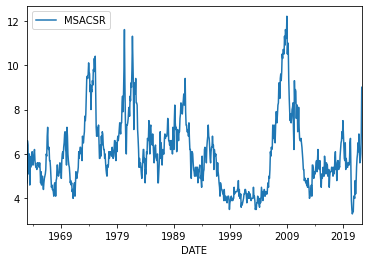

In [31]:
supply_df.plot.line('DATE', 'MSACSR')
plt.show()

In [73]:
econ_df = pd.read_csv('data/raw/Macroecon_US.csv')

# Clean col names
econ_df.columns = econ_df.columns.str.strip()

# Remove extraneous columns
econ_df = econ_df.drop(['Date Fraction'], axis=1)  # Date Fraction contains no extra information
econ_df = econ_df.loc[:, ~econ_df.columns.str.contains('^Unnamed')]  # Drop unnamed cols

print(econ_df.info())

In [74]:
## Convert econ data Dates from object to pd.datetime

# Rename date column to be consistent with other dataframes
econ_df = econ_df.rename(columns={'Date': 'DATE'})

# Get the date column in to a format strftime can handle
econ_df['DATE'] = econ_df['DATE'].apply(lambda x: "{:.2f}".format(x))  # convert to str, keep trailing zeros
econ_df['DATE'] = econ_df['DATE'] + '.01'  # Assume data is from the first of each month
econ_df['DATE'] = econ_df['DATE'].str.replace('.', '-', regex=False)

# Convert to datetime object
econ_df['DATE'] = pd.to_datetime(econ_df['DATE'], format='%Y-%m-%d')

econ_df.head(12)

,DATE,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE,Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,103.43,6.06,103.43,9.32,9.32,NaN,NaN,NaN,1.0,1.00,13.06%,9.25%,3.81%
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,101.72,5.88,102.21,9.04,9.09,NaN,NaN,NaN,1.0,0.97,13.09%,9.46%,3.62%
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,102.68,5.79,103.66,8.91,8.99,NaN,NaN,NaN,1.0,0.96,13.10%,9.62%,3.48%
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,109.58,6.01,111.13,9.25,9.38,NaN,NaN,NaN,1.0,1.00,12.21%,9.10%,3.11%
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,114.97,6.15,117.11,9.46,9.64,NaN,NaN,NaN,1.0,1.03,12.26%,8.95%,3.31%
5,1871-06-01,4.82,0.26,0.4,12.08,5.34,115.82,6.25,118.51,9.61,9.83,NaN,NaN,NaN,1.0,1.05,12.31%,8.77%,3.54%
6,1871-07-01,4.73,0.26,0.4,12.08,5.34,113.65,6.25,116.83,9.61,9.88,NaN,NaN,NaN,1.0,1.06,12.00%,8.66%,3.34%
7,1871-08-01,4.79,0.26,0.4,11.89,5.34,116.94,6.35,120.75,9.77,10.08,NaN,NaN,NaN,1.0,1.08,11.19%,8.27%,2.93%
8,1871-09-01,4.84,0.26,0.4,12.18,5.35,115.39,6.20,119.68,9.54,9.89,NaN,NaN,NaN,1.0,1.06,11.00%,8.10%,2.90%
9,1871-10-01,4.59,0.26,0.4,12.37,5.35,107.74,6.10,112.28,9.39,9.78,NaN,NaN,NaN,1.0,1.05,11.48%,8.17%,3.31%


### Data Wrangling

In [34]:
# Don't do this because we need as much data as possible

# Sum every 3 months to get cumulative quarterly supply change
#agg_func_supply = {'DATE': 'first', 'MSACSR': 'sum'}  # Keep the first date and sum supply
#quarterly_supply = supply_df.groupby(supply_df.index // 3).agg(agg_func_supply)

# Trim last quarter to match price data length
#quarterly_supply = quarterly_supply[:-1]

# Set date columns to indices for time-series
#quarterly_supply = quarterly_supply.set_index('DATE')
#prices = price_df.set_index('DATE')

#print(quarterly_supply.shape, prices.shape)
#quarterly_supply.head()

### Price Data Interpolation

In [75]:
inter_df = supply_df.merge(price_df, on='DATE', how='left')  # Combine data into df for interpolation
inter_df = inter_df.set_index('DATE')  # Index must be datetime for resampling

print(inter_df.head(10))

            MSACSR    MSPUS
DATE                       
1963-01-01     4.7  17800.0
1963-02-01     6.6      NaN
1963-03-01     6.4      NaN
1963-04-01     5.3  18000.0
1963-05-01     5.1      NaN
1963-06-01     6.0      NaN
1963-07-01     4.6  17900.0
1963-08-01     5.6      NaN
1963-09-01     5.4      NaN
1963-10-01     5.9  18500.0


In [76]:
df_pad = inter_df
df_pad['MSPUS'] = inter_df['MSPUS'].interpolate()

df_pad.head(10)

,MSACSR,MSPUS
DATE,,
1963-01-01,4.7,17800.000000
1963-02-01,6.6,17866.666667
1963-03-01,6.4,17933.333333
1963-04-01,5.3,18000.000000
1963-05-01,5.1,17966.666667
1963-06-01,6.0,17933.333333
1963-07-01,4.6,17900.000000
1963-08-01,5.6,18100.000000
1963-09-01,5.4,18300.000000


In [48]:
econ_df.head()

econ_df.loc[econ_df['DATE'] == '1963-01-01']

,DATE,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE,Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns,null_locations
1104,1963-01-01,65.06,2.14,3.68,30.4,3.83,621.38,20.41,"73,576.49",35.18,"4,165.49",19.26,22.79,2.71%,1.0,11.97,5.94%,-0.01%,5.95%,
1113,1963-01-01,73.03,2.23,3.98,30.8,4.11,688.44,21.05,"83,461.13",37.52,"4,548.48",20.89,24.63,2.00%,1.0,11.89,3.35%,-0.36%,3.71%,


### Merge Economic Data

In [77]:
df = df_pad.merge(econ_df, on='DATE', how='left')  # Combine data into df for interpolation

df.head(12)

,DATE,MSACSR,MSPUS,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Long Interest Rate GS10,Real Price,Real Dividend,...,Real Earnings,Real TR Scaled Earnings,Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE,Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns
0,1963-01-01,4.7,17800.000000,65.06,2.14,3.68,30.4,3.83,621.38,20.41,...,35.18,"4,165.49",19.26,22.79,2.71%,1.00,11.97,5.94%,-0.01%,5.95%
1,1963-02-01,6.6,17866.666667,65.92,2.14,3.70,30.4,3.92,629.59,20.47,...,35.31,"4,191.90",19.47,23.03,2.60%,1.00,11.92,5.34%,-0.12%,5.46%
2,1963-03-01,6.4,17933.333333,65.67,2.15,3.71,30.5,3.93,625.15,20.47,...,35.32,"4,204.66",19.29,22.81,2.63%,1.00,11.91,5.14%,-0.20%,5.34%
3,1963-04-01,5.3,18000.000000,68.76,2.17,3.75,30.5,3.97,654.56,20.63,...,35.73,"4,264.94",20.15,23.82,2.37%,1.01,11.91,4.39%,-0.18%,4.57%
4,1963-05-01,5.1,17966.666667,70.14,2.18,3.80,30.5,3.93,667.70,20.78,...,36.14,"4,325.38",20.51,24.23,2.29%,1.00,11.98,3.81%,-0.39%,4.20%
5,1963-06-01,6.0,17933.333333,70.11,2.20,3.84,30.6,3.99,665.23,20.87,...,36.44,"4,371.85",20.38,24.08,2.25%,1.00,11.93,3.55%,-0.39%,3.93%
6,1963-07-01,4.6,17900.000000,69.07,2.20,3.88,30.7,4.02,653.23,20.84,...,36.70,"4,414.70",19.97,23.58,2.36%,1.00,11.90,3.81%,-0.49%,4.30%
7,1963-08-01,5.6,18100.000000,70.98,2.21,3.92,30.7,4.00,671.29,20.87,...,37.07,"4,471.77",20.47,24.16,2.21%,1.00,11.96,3.14%,-0.85%,3.99%
8,1963-09-01,5.4,18300.000000,72.85,2.21,3.96,30.7,4.08,688.98,20.90,...,37.45,"4,528.82",20.96,24.73,2.02%,1.00,11.92,3.03%,-0.56%,3.59%
9,1963-10-01,5.9,18500.000000,73.03,2.23,3.98,30.8,4.11,688.44,21.05,...,37.52,"4,548.48",20.89,24.63,2.00%,1.00,11.89,3.35%,-0.36%,3.71%


### Null Values

In [38]:
# Run to see where null values are located by rows

pd.reset_option('^display.', silent=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Print entire dataframe
    nulls = econ_df.copy().isnull().sum(axis=1)
    econ_df['null_locations'] = econ_df.copy().apply(lambda x: ','.join(x[x.isnull()].index), axis=1)
    print(econ_df['null_locations'])
    #print(nulls)

0       Cyclically Adjusted Price Earnings Ratio P/E10...
1       Cyclically Adjusted Price Earnings Ratio P/E10...
2       Cyclically Adjusted Price Earnings Ratio P/E10...
3       Cyclically Adjusted Price Earnings Ratio P/E10...
4       Cyclically Adjusted Price Earnings Ratio P/E10...
5       Cyclically Adjusted Price Earnings Ratio P/E10...
6       Cyclically Adjusted Price Earnings Ratio P/E10...
7       Cyclically Adjusted Price Earnings Ratio P/E10...
8       Cyclically Adjusted Price Earnings Ratio P/E10...
9       Cyclically Adjusted Price Earnings Ratio P/E10...
10      Cyclically Adjusted Price Earnings Ratio P/E10...
11      Cyclically Adjusted Price Earnings Ratio P/E10...
12      Cyclically Adjusted Price Earnings Ratio P/E10...
13      Cyclically Adjusted Price Earnings Ratio P/E10...
14      Cyclically Adjusted Price Earnings Ratio P/E10...
15      Cyclically Adjusted Price Earnings Ratio P/E10...
16      Cyclically Adjusted Price Earnings Ratio P/E10...
17      Cyclic

In [78]:
# Columns with the most null values

df.isnull().sum(axis=0)

DATE                                                                           0
MSACSR                                                                         0
MSPUS                                                                          0
S&P Comp.                                                                      0
Dividend                                                                       1
Earnings                                                                       4
Consumer Price Index CPI                                                       0
Long Interest Rate GS10                                                        0
Real Price                                                                     0
Real Dividend                                                                  1
Real Total Return Price                                                        0
Real Earnings                                                                  4
Real TR Scaled Earnings     

Since all the null values are during earlier years and more recent years, let's try just removing the head and tail of the dataframe where any null values are located. This removes about 17% of rows (712 -> 592).

If this removes too much data we can look at removing just the columns with the most nulls, this would put the removed data down to 712 -> 708 or less than 1%.

In [79]:
print('Before:', df.shape)
df = df.dropna(axis='index')
print('After:', df.shape)

Before: (712, 21)
After: (592, 21)


In [80]:
df.head(12)

,DATE,MSACSR,MSPUS,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Long Interest Rate GS10,Real Price,Real Dividend,...,Real Earnings,Real TR Scaled Earnings,Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE,Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns
0,1963-01-01,4.7,17800.000000,65.06,2.14,3.68,30.4,3.83,621.38,20.41,...,35.18,"4,165.49",19.26,22.79,2.71%,1.00,11.97,5.94%,-0.01%,5.95%
1,1963-02-01,6.6,17866.666667,65.92,2.14,3.70,30.4,3.92,629.59,20.47,...,35.31,"4,191.90",19.47,23.03,2.60%,1.00,11.92,5.34%,-0.12%,5.46%
2,1963-03-01,6.4,17933.333333,65.67,2.15,3.71,30.5,3.93,625.15,20.47,...,35.32,"4,204.66",19.29,22.81,2.63%,1.00,11.91,5.14%,-0.20%,5.34%
3,1963-04-01,5.3,18000.000000,68.76,2.17,3.75,30.5,3.97,654.56,20.63,...,35.73,"4,264.94",20.15,23.82,2.37%,1.01,11.91,4.39%,-0.18%,4.57%
4,1963-05-01,5.1,17966.666667,70.14,2.18,3.80,30.5,3.93,667.70,20.78,...,36.14,"4,325.38",20.51,24.23,2.29%,1.00,11.98,3.81%,-0.39%,4.20%
5,1963-06-01,6.0,17933.333333,70.11,2.20,3.84,30.6,3.99,665.23,20.87,...,36.44,"4,371.85",20.38,24.08,2.25%,1.00,11.93,3.55%,-0.39%,3.93%
6,1963-07-01,4.6,17900.000000,69.07,2.20,3.88,30.7,4.02,653.23,20.84,...,36.70,"4,414.70",19.97,23.58,2.36%,1.00,11.90,3.81%,-0.49%,4.30%
7,1963-08-01,5.6,18100.000000,70.98,2.21,3.92,30.7,4.00,671.29,20.87,...,37.07,"4,471.77",20.47,24.16,2.21%,1.00,11.96,3.14%,-0.85%,3.99%
8,1963-09-01,5.4,18300.000000,72.85,2.21,3.96,30.7,4.08,688.98,20.90,...,37.45,"4,528.82",20.96,24.73,2.02%,1.00,11.92,3.03%,-0.56%,3.59%
9,1963-10-01,5.9,18500.000000,73.03,2.23,3.98,30.8,4.11,688.44,21.05,...,37.52,"4,548.48",20.89,24.63,2.00%,1.00,11.89,3.35%,-0.36%,3.71%


### EDA

<AxesSubplot:>

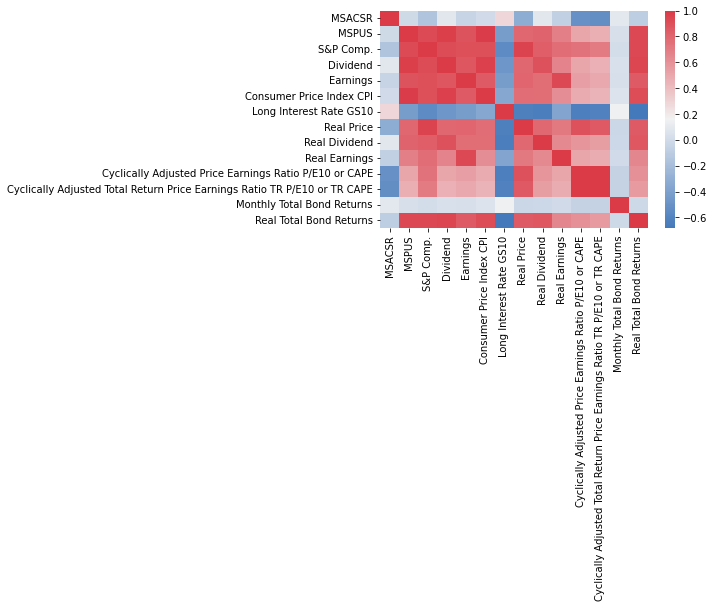

In [87]:
corr = df.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

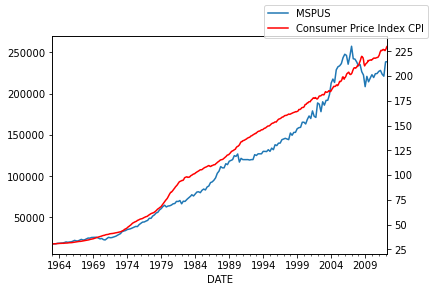

In [92]:
ax = df.plot(x='DATE', y='MSPUS', legend=False)
ax2 = ax.twinx()
df.plot(x='DATE', y='Consumer Price Index CPI', ax=ax2, legend=False, color='r')
ax.figure.legend()
plt.show()

In [ ]:
# Test for stationerity

If data shows a strong trend or seasonality, it is not stationary.

Price data is not stationary

Differencing is one way to make stationary for classical models

1        66.666667
2        66.666667
3        66.666667
4       -33.333333
5       -33.333333
          ...     
587    5766.666667
588    5766.666667
589     100.000000
590     100.000000
591     100.000000
Name: MSPUS, Length: 591, dtype: float64


<AxesSubplot:>

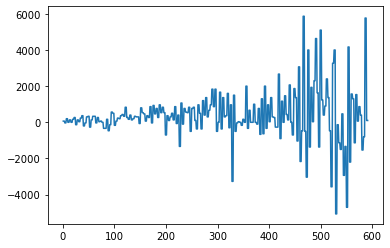

In [137]:
price_diff = df['MSPUS'].diff().dropna()
print(price_diff)

price_diff.plot()

After running the difference between each successive entry in the price series, we can see that the variance increases as time goes on. 

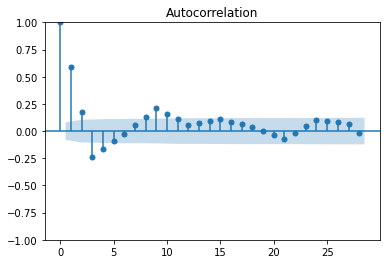

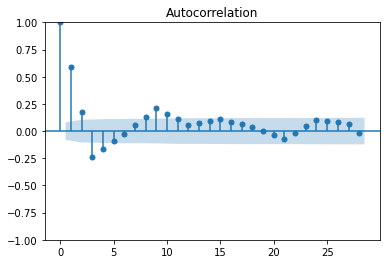

In [105]:
sm.graphics.tsa.plot_acf(price_diff)

391 200
Iteration:      1,   Func. Count:      5,   Neg. LLF: 2392.67177987632
Iteration:      2,   Func. Count:     11,   Neg. LLF: 2085.1078623577696
Iteration:      3,   Func. Count:     15,   Neg. LLF: 2085.102984070334
Iteration:      4,   Func. Count:     19,   Neg. LLF: 2085.048501371443
Iteration:      5,   Func. Count:     23,   Neg. LLF: 2084.767323311293
Iteration:      6,   Func. Count:     27,   Neg. LLF: 2083.871766862877
Iteration:      7,   Func. Count:     31,   Neg. LLF: 2083.3315170294286
Iteration:      8,   Func. Count:     35,   Neg. LLF: 2083.1619010403547
Iteration:      9,   Func. Count:     39,   Neg. LLF: 2083.1048808269834
Iteration:     10,   Func. Count:     43,   Neg. LLF: 2083.0888009895457
Iteration:     11,   Func. Count:     47,   Neg. LLF: 2083.081994630837
Iteration:     12,   Func. Count:     51,   Neg. LLF: 2083.078439518721
Iteration:     13,   Func. Count:     55,   Neg. LLF: 2083.0773838534183
Iteration:     14,   Func. Count:     59,   Neg. LL

/home/harrison/anaconda3/envs/mas-thesis/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


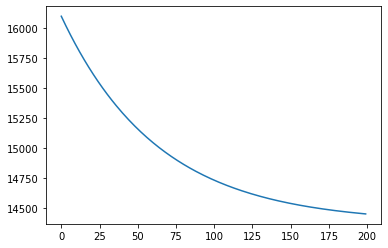

In [138]:
# Try a simple GARCH model
# Autoregressivice Conditional Heteroskedasticity
# Used to predict volatility

# Zero mean for model
price_diff = price_diff - price_diff.mean()

TEST_SIZE = 200
train, test = price_diff[:-TEST_SIZE], price_diff[-TEST_SIZE:]
print(len(train), len(test))

# TODO: experiment with p, q values (lag order of symmetric innovation, lagged volatility respectively) 
# AIC is recommended for forecasting, BIC for explanatory modeling
model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=1, rescale=True)  # Auto rescale values for optimizer
fitted = model.fit()

yhat = fitted.forecast(horizon=TEST_SIZE)
plt.plot(yhat.variance.values[-1, :])
plt.show()

In [ ]:
# TODO: Pair GARCH with ARIMA to get simple predictions

<AxesSubplot:>

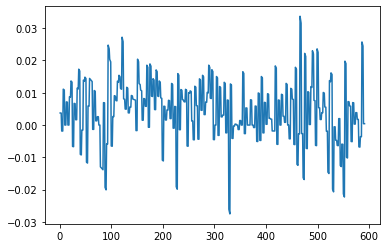

In [106]:
# Try with log diff (can also be thought of as log returns)

# Math note: log(P[t] / P[t-1]) = logP[t] - logP[t-1]
log_diff = np.log( df['MSPUS'] / df['MSPUS'].shift(1) ).dropna()
log_diff.plot()

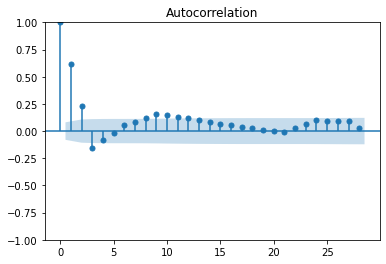

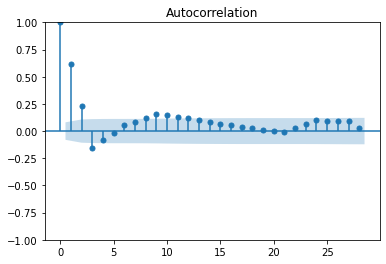

In [107]:
sm.graphics.tsa.plot_acf(log_diff)

### Save Processed Data

In [81]:
df.to_pickle('data/processed.pkl')